<a href="https://colab.research.google.com/github/1Nine2/Employment-and-Sustainability/blob/main/visualizaciones_pm10_residuos_construccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importaciones para análisis exploratorio de datos (EDA)
import pandas as pd
import numpy as np

# Importaciones para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data_pm = pd.read_csv('pm_cleaned.csv')

In [ ]:
data_pm

,FECHA,PM 10,ESTACION
0,2009-04-15,19.239130,Garage Muncipal
1,2009-04-16,27.479167,Garage Muncipal
2,2009-04-17,27.333333,Garage Muncipal
3,2009-04-18,37.312500,Garage Muncipal
4,2009-04-19,25.085106,Garage Muncipal
...,...,...,...
4311,2023-12-27,30.760870,Garage Muncipal
4312,2023-12-28,24.369565,Garage Muncipal
4313,2023-12-29,29.458333,Garage Muncipal
4314,2023-12-30,40.625000,Garage Muncipal


In [ ]:
data_dem = pd.read_csv('demolicion_cleaned.csv')

In [ ]:
data_dem

,FECHA,GRAVA m3,GRAVILLA m3,ARENA m3,PIEDRAS m3,TIERRA m3,TOTAL m3,MACRODISTRITO DONDE SE ENTREGO
0,2022-01-20,0.000,16.000,0.000,0,0,16.000,Centro
1,2022-02-11,0.000,10.000,0.000,0,0,10.000,Centro
2,2022-02-17,0.000,0.000,33.000,0,0,33.000,Centro
3,2022-04-20,0.000,0.000,2.500,0,0,2.500,Sur
4,2022-05-26,0.000,0.000,1.750,0,0,1.750,Centro
5,2022-07-07,6.000,0.000,0.000,0,0,6.000,Centro
6,2022-07-21,12.000,0.000,0.000,13,0,25.000,Sur
7,2022-07-26,0.000,42.000,0.000,0,0,42.000,Sur
8,2022-08-17,0.000,0.000,0.000,4,0,4.000,Sur
9,2022-09-16,0.000,4.000,4.000,0,0,8.000,Cotahuma


In [ ]:
fig_relacion = px.bar(data_dem, x='MACRODISTRITO DONDE SE ENTREGO', y='TOTAL m3', title='Relación entre Macrodistrito y Total m3', color_discrete_sequence=['pink'],
                          labels={'MACRODISTRITO DONDE SE ENTREGO': 'Macrodistrito',  'TOTAL m3': 'Total m3'})
fig_relacion.update_layout(xaxis_title='Macrodistrito', yaxis_title='Total m3')

fig_relacion.show()

In [ ]:
fig1 = px.line(data_dem, x='FECHA', y="TOTAL m3", color_discrete_sequence=['green'] )
fig2 = px.line(data_pm, x='FECHA', y="PM 10",  color_discrete_sequence=['white'])
fig1.show()
fig2.show()
#relacion entre la fecha y los tatoales en residuos
#relacion entre fecha y la cantidad de pm 10

In [ ]:
data_dem.shape

(19, 8)

In [ ]:

#data_pm_limited

In [ ]:
conteo_categorias = data_dem['MACRODISTRITO DONDE SE ENTREGO'].value_counts()
categorias_ordenadas = conteo_categorias.index

# Graficar el conteo de categorías con colores distintos y ordenadas
fig = px.bar(data_dem, x='MACRODISTRITO DONDE SE ENTREGO',
             title='Conteo de Categorías',
             labels={'MACRODISTRITO DONDE SE ENTREGO': 'MACRODISTRITO'},
             color_discrete_sequence=['pink'],
             category_orders={'MACRODISTRITO DONDE SE ENTREGO': categorias_ordenadas})

# Configurar etiquetas y título
fig.update_layout(xaxis_title='MACRODISTRITO', yaxis_title='Conteo')

# Mostrar el gráfico
fig.show()

RELACION ENTRE EL PM Y LOS RESIDUOS TOTALES m3 DE CONSTRUCCIONES

In [ ]:
columnas_sumar = ['GRAVA m3', 'GRAVILLA m3', 'ARENA m3', 'PIEDRAS m3', 'TIERRA m3']

# Obtener la suma de valores en cada columna
suma_valores = data_dem[columnas_sumar].sum()

# Crear un DataFrame con la suma de valores
df_suma = pd.DataFrame({'Variable': suma_valores.index, 'Suma': suma_valores.values})
df_suma = df_suma.sort_values(by='Suma', ascending=False)

# Graficar la suma de valores
fig = px.bar(df_suma, x='Variable', y='Suma',
             labels={'Suma': 'Suma de Valores', 'Variable': 'Variables'},
             color='Variable',
             title='Suma de Valores en las Variables de Material')

# Configurar etiquetas y título
fig.update_layout(xaxis_title='tipos', yaxis_title='año 2022')


# Mostrar el gráfico
fig.show()

In [ ]:
data_pm_limited = data_pm.iloc[3828:]
pm_rcd = px.line(data_pm_limited, x='FECHA', y='PM 10', labels={'PM 10': 'PM 10'})
pm_rcd.add_scatter(x=data_dem['FECHA'], y=data_dem['TOTAL m3'], mode='lines', name='TOTAL m3', line=dict(dash='dash'))
pm_rcd.update_layout(title='Comportamiento de PM 10 y TOTAL m3 a lo largo del tiempo', xaxis_title='Fecha', yaxis_title='Valor')
pm_rcd.show()

In [ ]:
agf = sns.displot(
    data=,
    x='bill_length_mm',
    y='bill_depth_mm',
    kind='kde',
    rug=True
)


In [ ]:
data_rcd = pd.read_csv('residuosdeconstruccionydemolicion_rcd_2021(cleaned).csv')

In [ ]:
data_rcd

,FECHA,NOMBRE/INSTITUCIÓN,ETAPA,m3,GESTION,MES
0,2021-09-08,Institucion privada,Construcción,4,9,2021
1,2021-09-06,Institucion privada,Construcción,4,9,2021
2,2021-09-03,Institucion privada,Construcción,4,9,2021
3,2021-09-02,Institucion privada,Construcción,4,9,2021
4,2021-09-01,Institucion privada,Construcción,4,9,2021
5,2021-08-30,Institucion privada,Construcción,4,8,2021
6,2021-08-24,Institucion privada,Construcción,4,8,2021
7,2021-08-21,Institucion privada,Construcción,4,8,2021
8,2021-08-20,Institucion privada,Construcción,4,8,2021
9,2021-08-12,Institucion privada,Construcción,4,8,2021


In [ ]:
fig1 = px.line(data_rcd, x='FECHA', y="m3")
fig1.show()

In [ ]:
fig = px.bar(data_rcd, x='NOMBRE/INSTITUCIÓN',
             labels={'Suma': 'Suma de Valores', 'Variable': 'Variables'},
             title='Suma de Valores en las Variables de Material',
             color='NOMBRE/INSTITUCIÓN')
fig.show()

In [ ]:
data_pesos = pd.read_csv('registro-gral.-de-pesos-residuos-siremu(cleaned) (1).csv')

In [ ]:
data_pesos

,GESTION,MES,COMUNES KG,PAPEL Y CARTON KG,VIDRIO KG,METAL KG,PLASTICOS KG,PATOGENOS KG,PODA KG,ORGANICO KG,DIFERENCIADO PARTICULAR KG,PAPEL PLASTICO KG,TOTAL KG,MALLASA KG,TOTAL GLOBAL SAKA CHURU_MALLASA KG,TOTAL TON
0,2019,1,13622500,4880,2669,130,2270,140900,54130,0.0,0.0,0.0,13827479,0.0,0.0,1.382748e+04
1,2019,2,23643250,11980,4080,920,5960,235130,139070,0.0,0.0,0.0,24040390,0.0,0.0,2.404039e+04
2,2019,3,20693920,9230,3120,380,4230,215890,125960,0.0,0.0,0.0,21052730,0.0,0.0,2.105273e+04
3,2019,4,19857440,7390,3680,370,4240,222200,127230,0.0,0.0,0.0,20222550,0.0,0.0,2.022255e+04
4,2019,5,19851460,7590,2830,230,5080,233200,120270,0.0,0.0,0.0,20220660,0.0,0.0,2.022066e+04
5,2019,6,18440060,5270,3230,210,3590,211140,120230,0.0,0.0,0.0,18783730,0.0,0.0,1.878373e+04
6,2019,7,18907340,6250,3890,1100,4850,214060,141000,0.0,0.0,0.0,19278490,0.0,0.0,1.927849e+04
7,2019,8,17852120,8300,4640,430,4420,208790,128090,0.0,0.0,0.0,18206790,0.0,0.0,1.820679e+04
8,2019,9,16904300,7600,5070,430,4940,196310,134340,0.0,0.0,0.0,17252990,0.0,0.0,1.725299e+04
9,2019,10,19461990,4400,2860,330,4960,239420,135050,0.0,0.0,0.0,19849010,0.0,0.0,1.984901e+04


In [ ]:
data_pesos_sorted = data_pesos.sort_values(by='GESTION', ascending=False)
data_pesos


,GESTION,MES,COMUNES KG,PAPEL Y CARTON KG,VIDRIO KG,METAL KG,PLASTICOS KG,PATOGENOS KG,PODA KG,ORGANICO KG,DIFERENCIADO PARTICULAR KG,PAPEL PLASTICO KG,TOTAL KG,MALLASA KG,TOTAL GLOBAL SAKA CHURU_MALLASA KG,TOTAL TON
0,2019,1,13622500,4880,2669,130,2270,140900,54130,0.0,0.0,0.0,13827479,0.0,0.0,1.382748e+04
1,2019,2,23643250,11980,4080,920,5960,235130,139070,0.0,0.0,0.0,24040390,0.0,0.0,2.404039e+04
2,2019,3,20693920,9230,3120,380,4230,215890,125960,0.0,0.0,0.0,21052730,0.0,0.0,2.105273e+04
3,2019,4,19857440,7390,3680,370,4240,222200,127230,0.0,0.0,0.0,20222550,0.0,0.0,2.022255e+04
4,2019,5,19851460,7590,2830,230,5080,233200,120270,0.0,0.0,0.0,20220660,0.0,0.0,2.022066e+04
5,2019,6,18440060,5270,3230,210,3590,211140,120230,0.0,0.0,0.0,18783730,0.0,0.0,1.878373e+04
6,2019,7,18907340,6250,3890,1100,4850,214060,141000,0.0,0.0,0.0,19278490,0.0,0.0,1.927849e+04
7,2019,8,17852120,8300,4640,430,4420,208790,128090,0.0,0.0,0.0,18206790,0.0,0.0,1.820679e+04
8,2019,9,16904300,7600,5070,430,4940,196310,134340,0.0,0.0,0.0,17252990,0.0,0.0,1.725299e+04
9,2019,10,19461990,4400,2860,330,4960,239420,135050,0.0,0.0,0.0,19849010,0.0,0.0,1.984901e+04


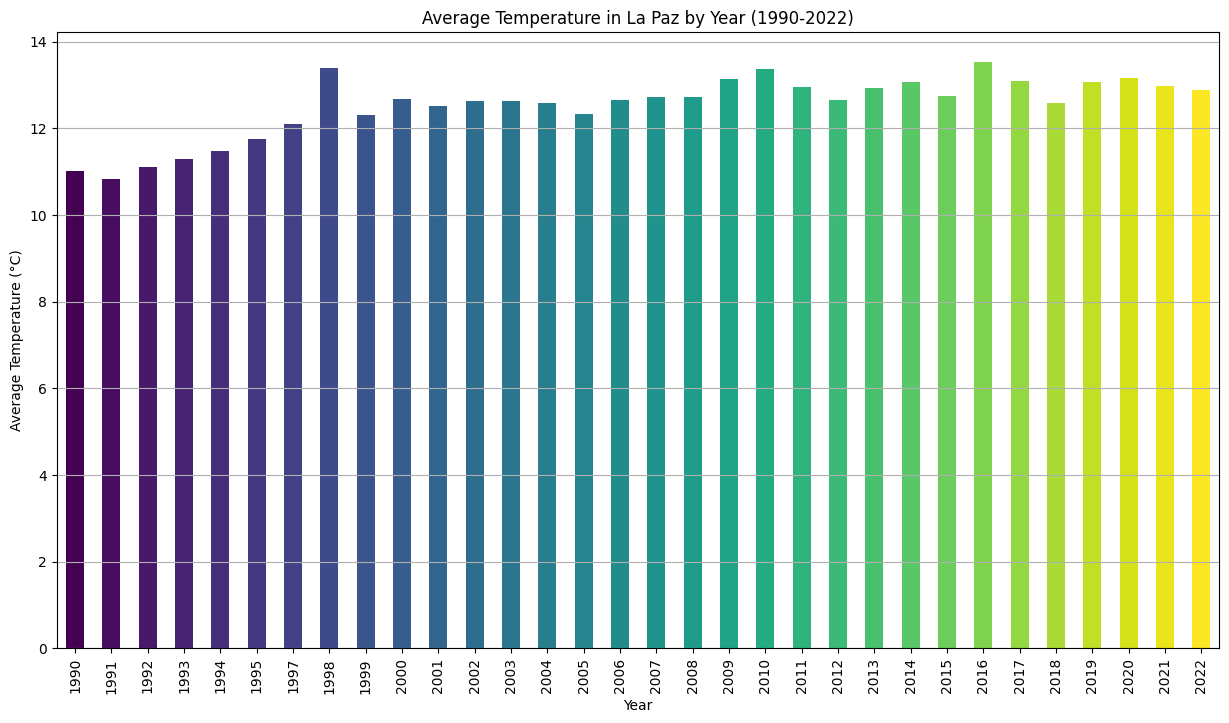

In [ ]:
data_temp = pd.read_excel('limpio_ bolivia-temperatura-media-por-principales-ciudades-1990-2022.xlsx')
data_temp['LA PAZ'].fillna(data_temp['LA PAZ'].mean(), inplace=True)
average_temp_by_year = data_temp.groupby('AÑO')['LA PAZ'].mean()
colors = plt.cm.viridis(np.linspace(0, 1, len(average_temp_by_year)))

temperatura = plt.figure(figsize=(15, 8))
average_temp_by_year.plot(kind='bar', color=colors)
plt.title('Average Temperature in La Paz by Year (1990-2022)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(axis='y')
plt.show()


In [ ]:
data_co = pd.read_excel('limpio_concent_2019-22.xlsx')
data_pm = pd.read_csv('pm_cleaned.csv')

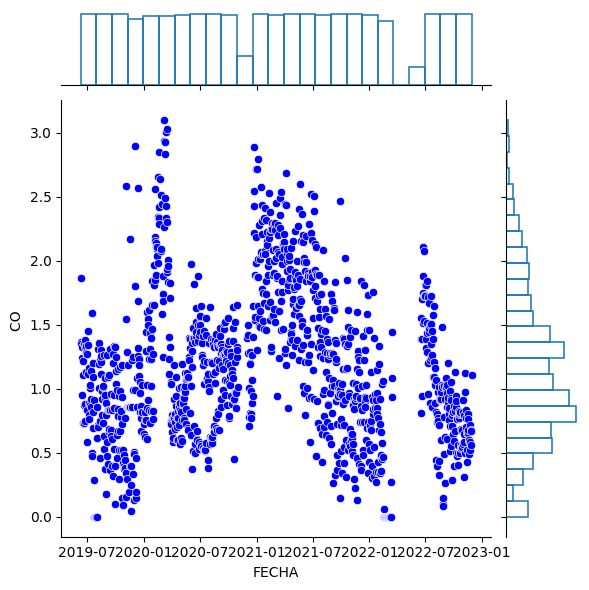

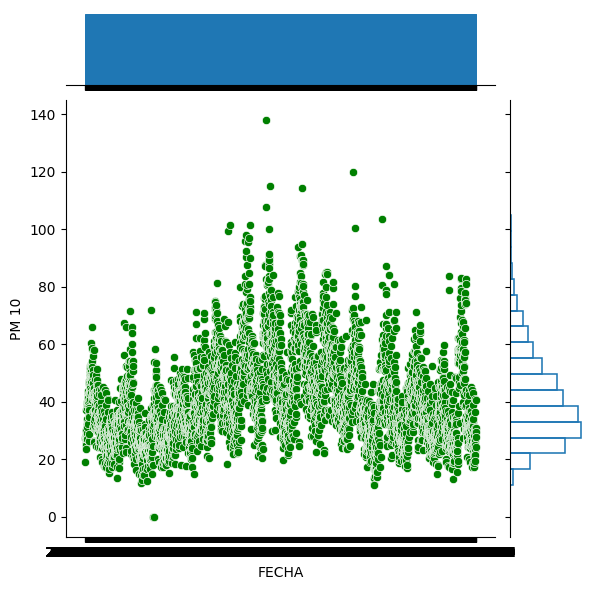

In [ ]:
co_jointplot = sns.jointplot(
    data=data_co,
    x='FECHA',
    y='CO ',
    kind='scatter',
    marginal_kws=dict(bins=25, fill=False),
    joint_kws=dict(color='blue')  # Set the color for CO
)

pm_jointplot = sns.jointplot(
    data=data_pm,
    x='FECHA',
    y='PM 10',
    kind='scatter',
    marginal_kws=dict(bins=25, fill=False),
    joint_kws=dict(color='green')  # Set the color for PM 10
)

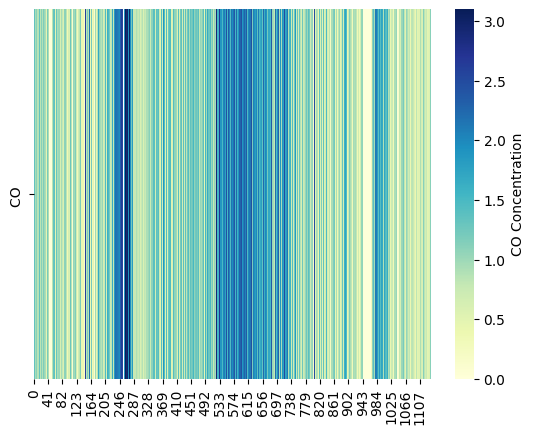

In [ ]:
co_heatmap_data = data_co[['CO ']].T
pm_heatmap_data = data_pm[['PM 10']].T

co_heatmap = sns.heatmap(co_heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'CO Concentration'})
#co_heatmap.title('Heatmap of CO Concentration Over Time')




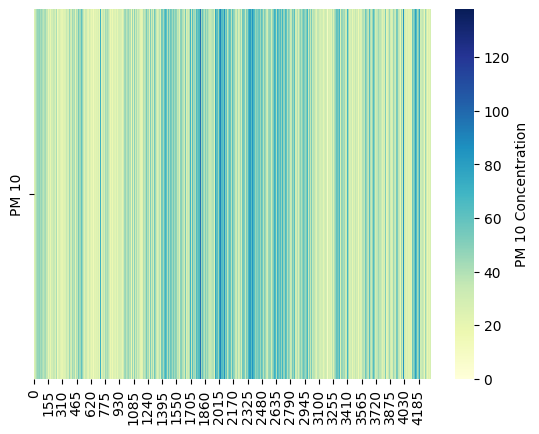

In [ ]:
pm_heatmap = sns.heatmap(pm_heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'PM 10 Concentration'})
#pm_heatmap.title('Heatmap of PM 10 Concentration Over Time')


In [ ]:

co_heatmap = px.imshow(co_heatmap_data, color_continuous_scale='YlGnBu', labels={'color': 'CO Concentration'})
pm_heatmap = px.imshow(pm_heatmap_data, color_continuous_scale='YlGnBu', labels={'color': 'PM 10 Concentration'})


In [ ]:
co_heatmap.show()

In [ ]:
co_jointplot = px.scatter(
    data_co,
    x='FECHA',
    y='CO ',
    marginal_x="histogram",
    marginal_y="histogram",
    color_continuous_scale='blues',
    title='CO Concentration Over Time'
)
co_jointplot.update_layout(coloraxis_colorbar=dict(title='CO Concentration'))

# Scatter plot con histogramas marginales para PM 10

# Muestra los gráficos en Str


In [ ]:
pm_jointplot = px.scatter(
    data_pm,
    x='FECHA',
    y='PM 10',
    marginal_x="histogram",
    marginal_y="histogram",
    color_continuous_scale='greens',
    title='PM 10 Concentration Over Time'
)
pm_jointplot.update_layout(coloraxis_colorbar=dict(title='PM 10 Concentration'))


In [ ]:
plot_comunes_kg = px.bar(data_pesos, x="MES", y="COMUNES KG", title="Bar Chart - Comunes KG")

plot_papel_carton_kg = px.line(data_pesos, x="MES", y="PAPEL Y CARTON KG", markers=True, title="Line Chart - Papel y Carton KG")

plot_vidrio_kg = px.scatter(data_pesos, x="MES", y="VIDRIO KG", title="Scatter Plot - Vidrio KG")


In [ ]:
plot_comunes_kg
plot_papel_carton_kg

In [ ]:
plot_vidrio_kg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-113-0ca3c34d7177>:9: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




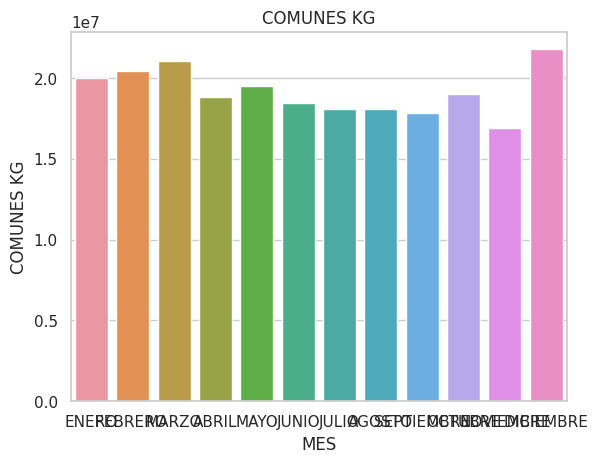

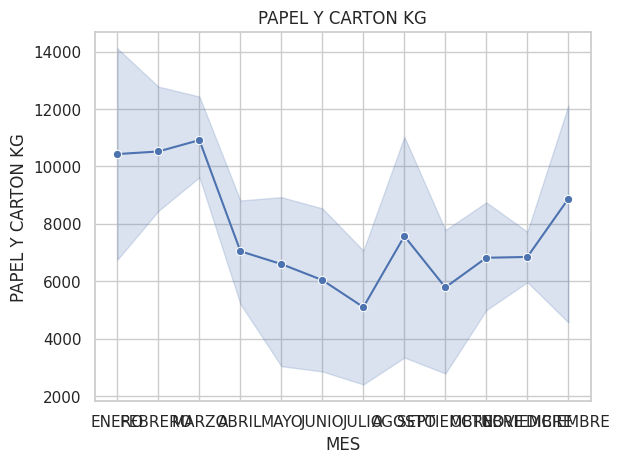

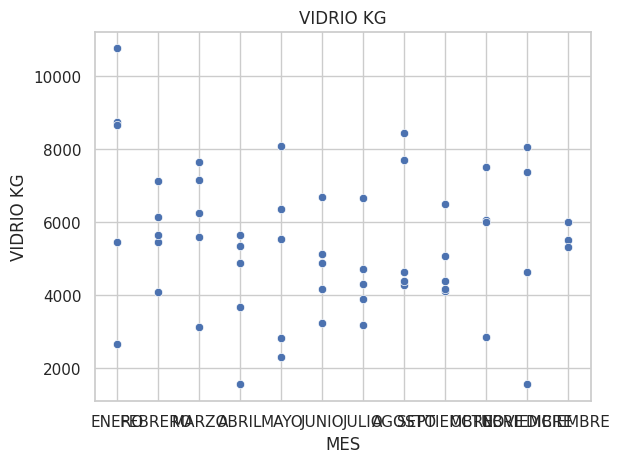

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming res is your DataFrame
# Set the style
sns.set(style="whitegrid")

# Plot 1: Bar plot for COMUNES KG
plot_comunes_kg = sns.barplot(x="MES", y="COMUNES KG", data=res, ci=None)
plot_comunes_kg.set_title("COMUNES KG")
plt.show()
# Plot 2: Line plot for PAPEL Y CARTON KG
plot_papel_carton_kg = sns.lineplot(x="MES", y="PAPEL Y CARTON KG", data=res, marker="o")
plot_papel_carton_kg.set_title("PAPEL Y CARTON KG")
plt.show()
# Plot 3: Scatter plot for VIDRIO KG
plot_vidrio_kg = sns.scatterplot(x="MES", y="VIDRIO KG", data=res)
plot_vidrio_kg.set_title("VIDRIO KG")

# ... Add more plots as needed
plt.show()
# Save the plots in variables
plot_comunes_kg_var = plt.gcf()
plot_papel_carton_kg_var = plt.gcf()
plot_vidrio_kg_var = plt.gcf()

# Show the plots



In [ ]:
strip_plot_patogenos = px.strip(
    data_pesos,
    x='MES',
    y='PATOGENOS KG',
    title="Strip Plot for PATOGENOS KG",
)
strip_plot_patogenos

In [ ]:
bar_plot_patogenos = px.bar(
    data_pesos,
    x='MES',
    y='PATOGENOS KG',
    color_discrete_sequence=['green'],  # Establecer el color de todas las barras a verde
    title="Bar Plot for PATOGENOS KG"
)
bar_plot_patogenos

In [ ]:
autumn_colors = ["#8C4A36", "#C88B5A", "#E1C2A3", "#7D4E38", "#B66946"]

# Crear el gráfico de barras con Plotly Express y aplicar la paleta de colores
bar_chart_temp = px.bar(
    x=average_temp_by_year.index,
    y=average_temp_by_year.values,
    labels={'x': 'Year', 'y': 'Average Temperature (°C)'},
    title='Average Temperature in La Paz by Year (1990-2022)',
    color_discrete_sequence=['olive']
)

In [ ]:
bar_chart_temp
